In [94]:
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, GRU, Input, SimpleRNN, Dropout
from keras.initializers import TruncatedNormal
from keras.constraints import MinMaxNorm
from keras.regularizers import l2
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
max_features = 10000
maxlen = 500  # обмеження кількості слів в тексті


# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features) #, skip_top=skip_top)

# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

In [177]:
skip_top = 200

(input_train_2, y_train_2), (input_test_2, y_test_2) = imdb.load_data(num_words=max_features, skip_top=skip_top)

input_train_2 = pad_sequences(input_train_2, maxlen=maxlen)
input_test_2 = pad_sequences(input_test_2, maxlen=maxlen)

In [162]:
def schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 7:
        return 0.0005
    else:
        return 0.0001

In [191]:
def schedule_2(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.0001

# EDA

In [3]:
input_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [4]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [5]:
from collections import OrderedDict

dct = imdb.get_word_index()
sorted_dct = OrderedDict(sorted(dct.items()))

for item in sorted_dct.items():    
    print(item)

('\x08\x08\x08\x08a', 68893)
('\x10own', 70879)
("'", 755)
("''", 17448)
("''a", 57351)
("''after", 64015)
("''bad", 72030)
("''cannibal", 58448)
("''clients''", 80824)
("''dark''", 66872)
("''empire", 52876)
("''family", 85943)
("''gaslight''", 58747)
("''heart''", 75354)
("''high", 66908)
("''holy", 83565)
("''human''", 61364)
("''humans''", 88090)
("''i'm", 61351)
("''if", 62727)
("''inuyasha''", 61770)
("''little''", 58164)
("''maison", 85895)
("''ned''", 62202)
("''negative''", 76149)
("''nice", 57008)
("''oh", 45418)
("''on", 66910)
("''oversexed''", 75509)
("''peeping", 81867)
("''professionals''", 76109)
("''ranma", 44903)
("''raptors''", 70722)
("''return", 55138)
("''saint", 51394)
("''scarface''", 51257)
("''sea", 49404)
("''talent", 84926)
("''terrorists''", 81627)
("''the", 20197)
("''their", 84051)
("''this", 66430)
("''thunderball", 87604)
("''troubled''", 79833)
("''unpleasant", 66417)
("''villain", 71277)
("''voyeur''", 70370)
("''we're", 66244)
("''while''", 65559)
("

In [6]:
print(dct["''bad"])

72030


In [7]:
print(dct["bad"])

75


In [8]:
print(dct["the"])

1


In [9]:
print(dct["'the"])

1062


In [10]:
len(dct)

88584

In [11]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler(feature_range = (0,1))
#input_train_scaled = scaler.fit_transform(input_train)
#input_test_scaled = scaler.fit_transform(input_test)

# LSTM

### 5 epochs, batch 128, rmsprop, no regularizers

In [12]:
model = Sequential()
model.add(Embedding(max_features, 32)) # Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
                                       # Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

2024-07-01 15:25:28.848165: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(input_train,
                    y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 69s 478ms/step - acc: 0.5633 - loss: 0.6758 - val_acc: 0.7831 - val_loss: 0.4732
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 72s 525ms/step - acc: 0.7925 - loss: 0.4582 - val_acc: 0.8257 - val_loss: 0.4008
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 70s 439ms/step - acc: 0.8611 - loss: 0.3424 - val_acc: 0.8636 - val_loss: 0.3352
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 454ms/step - acc: 0.8835 - loss: 0.2932 - val_acc: 0.8700 - val_loss: 0.3142
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 538ms/step - acc: 0.8947 - loss: 0.2682 - val_acc: 0.8541 - val_loss: 0.3482


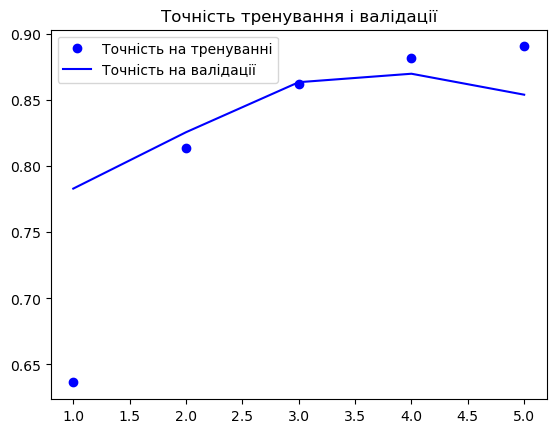

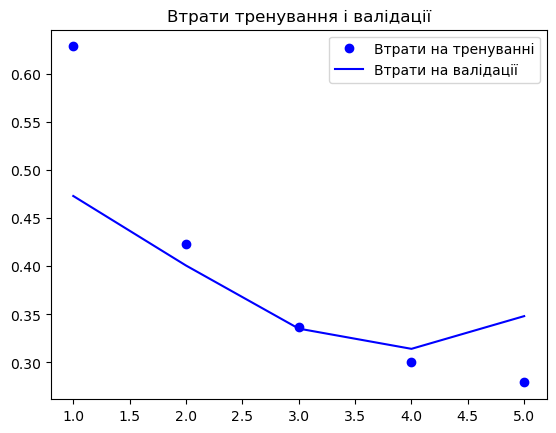

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
plt.title('Точність тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
plt.title('Втрати тренування і валідації')  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

In [15]:
predictions = model.predict(input_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 85ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - acc: 0.8528 - loss: 0.3543
Test Loss: 0.3532038927078247
Test Accuracy: 0.8523200154304504


### 10 epochs, batch 128, rmsprop, MinMaxNorm

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 425ms/step - acc: 0.5694 - loss: 0.6772 - val_acc: 0.7579 - val_loss: 0.4976
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 452ms/step - acc: 0.7958 - loss: 0.4483 - val_acc: 0.8496 - val_loss: 0.3581
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 452ms/step - acc: 0.8537 - loss: 0.3521 - val_acc: 0.8655 - val_loss: 0.3255
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 452ms/step - acc: 0.8747 - loss: 0.3081 - val_acc: 0.8629 - val_loss: 0.3341
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 452ms/step - acc: 0.8914 - loss: 0.2735 - val_acc: 0.8732 - val_loss: 0.3203
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 453ms/step - acc: 0.8951 - loss: 0.2673 - val_acc: 0.8799 - val_loss: 0.2996
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 453ms/step - acc: 0.9047 - loss: 0.2472 - val_acc: 0.8723 - val_loss: 0.3274
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 62s 453ms/step - acc: 0.9139 - loss: 0.2297 - val_acc: 0.8117 - val_loss: 0.5341
Epoch 9/10
137/137 ━━━━━━━━━━━━━

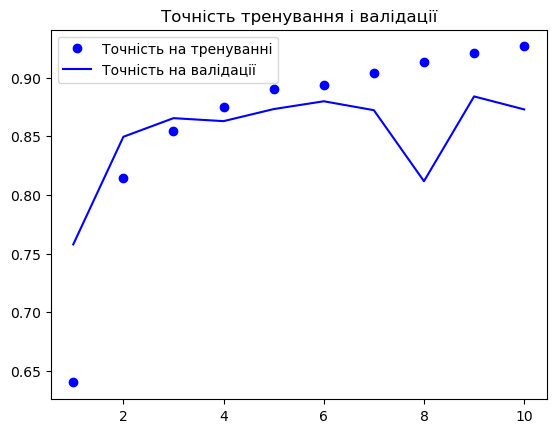

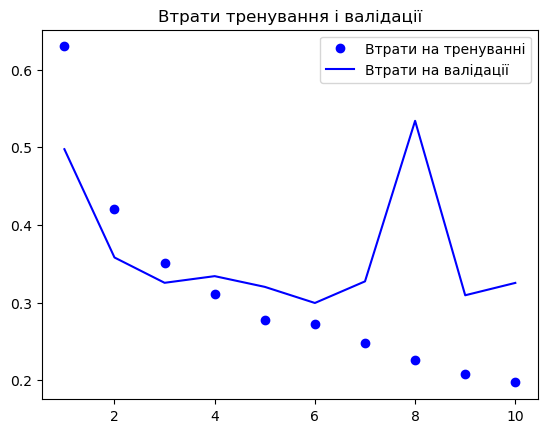

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [19]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 79ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - acc: 0.8622 - loss: 0.3472
Test Loss: 0.3454737365245819
Test Accuracy: 0.8641200065612793


### 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [12]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

2024-07-01 16:43:32.158989: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])                           

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 63s 427ms/step - acc: 0.5601 - loss: 0.6770 - val_acc: 0.7780 - val_loss: 0.5013
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 53s 386ms/step - acc: 0.7996 - loss: 0.4584 - val_acc: 0.8017 - val_loss: 0.4399
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 61s 444ms/step - acc: 0.8494 - loss: 0.3659 - val_acc: 0.8337 - val_loss: 0.3809
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 423ms/step - acc: 0.8817 - loss: 0.3024 - val_acc: 0.8685 - val_loss: 0.3176
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 58s 426ms/step - acc: 0.8936 - loss: 0.2804 - val_acc: 0.8479 - val_loss: 0.3559
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 59s 432ms/step - acc: 0.9043 - loss: 0.2551 - val_acc: 0.6528 - val_loss: 1.0120
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 60s 436ms/step - acc: 0.9072 - loss: 0.2465 - val_acc: 0.8196 - val_loss: 0.4630
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 59s 430ms/step - acc: 0.9129 - loss: 0.2301 - val_acc: 0.8788 - val_loss: 0.3254
Epoch 9/15
137/137 ━━━━━━━━━━━━━

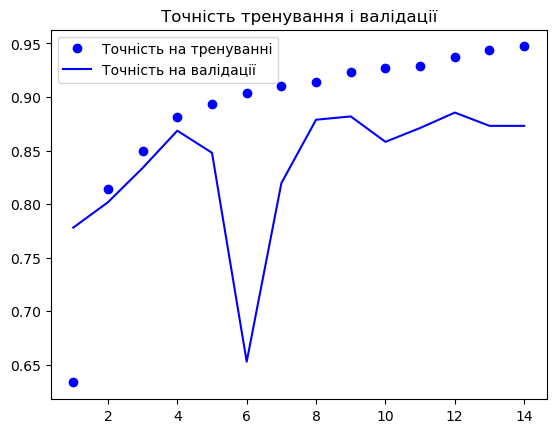

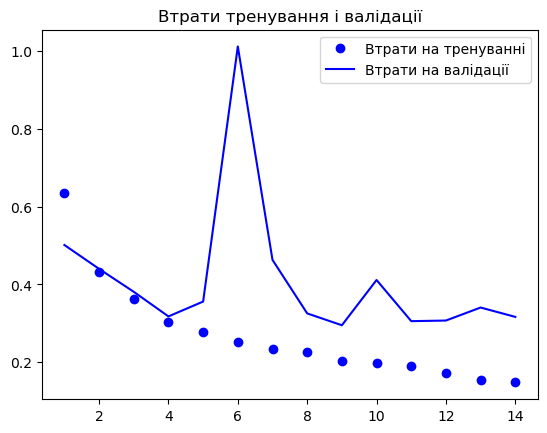

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [15]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - acc: 0.8744 - loss: 0.3113
Test Loss: 0.3065979778766632
Test Accuracy: 0.8772799968719482


### 15 epochs, batch 64, rmsprop, MinMaxNorm, earlystiop

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 102s 358ms/step - acc: 0.6142 - loss: 0.6327 - val_acc: 0.8480 - val_loss: 0.3727
Epoch 2/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 90s 328ms/step - acc: 0.8530 - loss: 0.3537 - val_acc: 0.8729 - val_loss: 0.3090
Epoch 3/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 89s 326ms/step - acc: 0.8781 - loss: 0.2966 - val_acc: 0.7669 - val_loss: 0.5723
Epoch 4/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 92s 335ms/step - acc: 0.8998 - loss: 0.2630 - val_acc: 0.8561 - val_loss: 0.3319
Epoch 5/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 136s 313ms/step - acc: 0.9137 - loss: 0.2241 - val_acc: 0.8760 - val_loss: 0.2973
Epoch 6/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 90s 329ms/step - acc: 0.9249 - loss: 0.2060 - val_acc: 0.8764 - val_loss: 0.3303
Epoch 7/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 92s 336ms/step - acc: 0.9343 - loss: 0.1821 - val_acc: 0.8723 - val_loss: 0.3268
Epoch 8/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 101s 368ms/step - acc: 0.9384 - loss: 0.1675 - val_acc: 0.8347 - val_loss: 0.4345
Epoch 9/15
274/274 ━━━━━━━━━━

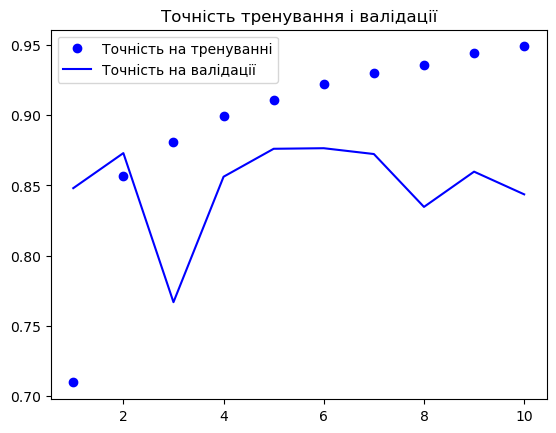

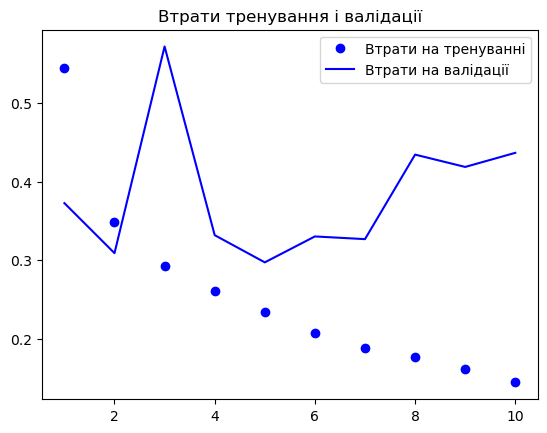

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [21]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - acc: 0.8726 - loss: 0.3055
Test Loss: 0.30382388830184937
Test Accuracy: 0.8743600249290466


### 15 epochs, batch 64, rmsprop, MinMaxNorm, earlystiop

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 102s 358ms/step - acc: 0.6142 - loss: 0.6327 - val_acc: 0.8480 - val_loss: 0.3727
Epoch 2/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 90s 328ms/step - acc: 0.8530 - loss: 0.3537 - val_acc: 0.8729 - val_loss: 0.3090
Epoch 3/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 89s 326ms/step - acc: 0.8781 - loss: 0.2966 - val_acc: 0.7669 - val_loss: 0.5723
Epoch 4/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 92s 335ms/step - acc: 0.8998 - loss: 0.2630 - val_acc: 0.8561 - val_loss: 0.3319
Epoch 5/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 136s 313ms/step - acc: 0.9137 - loss: 0.2241 - val_acc: 0.8760 - val_loss: 0.2973
Epoch 6/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 90s 329ms/step - acc: 0.9249 - loss: 0.2060 - val_acc: 0.8764 - val_loss: 0.3303
Epoch 7/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 92s 336ms/step - acc: 0.9343 - loss: 0.1821 - val_acc: 0.8723 - val_loss: 0.3268
Epoch 8/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 101s 368ms/step - acc: 0.9384 - loss: 0.1675 - val_acc: 0.8347 - val_loss: 0.4345
Epoch 9/15
274/274 ━━━━━━━━━━

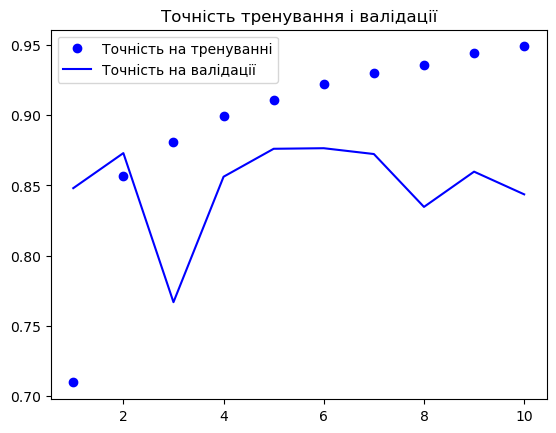

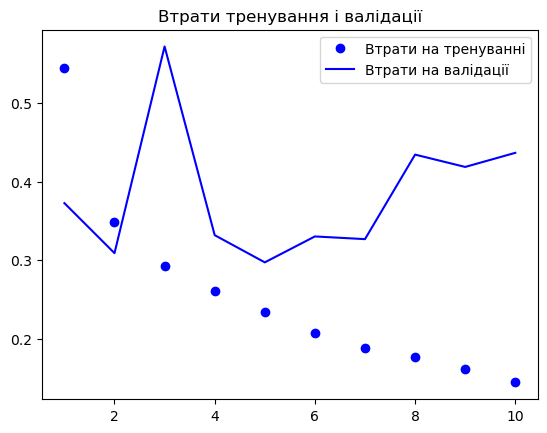

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [ ]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 90ms/step - acc: 0.8726 - loss: 0.3055
Test Loss: 0.30382388830184937
Test Accuracy: 0.8743600249290466


### LSTM * 2, 15 epochs, batch 64, rmsprop, MinMaxNorm, earlystiop

In [16]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True))
model.add(LSTM(8, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 178s 619ms/step - acc: 0.5948 - loss: 0.6455 - val_acc: 0.7257 - val_loss: 0.6489
Epoch 2/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 174s 635ms/step - acc: 0.8332 - loss: 0.4010 - val_acc: 0.8641 - val_loss: 0.3301
Epoch 3/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 172s 629ms/step - acc: 0.8769 - loss: 0.3109 - val_acc: 0.8611 - val_loss: 0.3297
Epoch 4/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 172s 627ms/step - acc: 0.9019 - loss: 0.2610 - val_acc: 0.8197 - val_loss: 0.4428
Epoch 5/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 174s 636ms/step - acc: 0.9138 - loss: 0.2328 - val_acc: 0.8092 - val_loss: 0.5299
Epoch 6/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 174s 634ms/step - acc: 0.9242 - loss: 0.2067 - val_acc: 0.8689 - val_loss: 0.3302
Epoch 7/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 179s 654ms/step - acc: 0.9338 - loss: 0.1854 - val_acc: 0.8881 - val_loss: 0.2957
Epoch 8/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 172s 627ms/step - acc: 0.9465 - loss: 0.1608 - val_acc: 0.8873 - val_loss: 0.2959
Epoch 9/15
274/274 ━━━━━

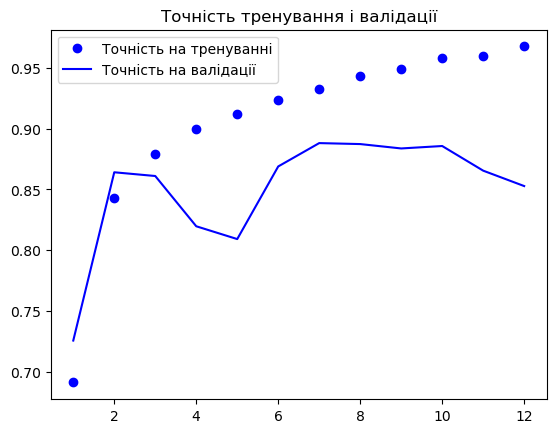

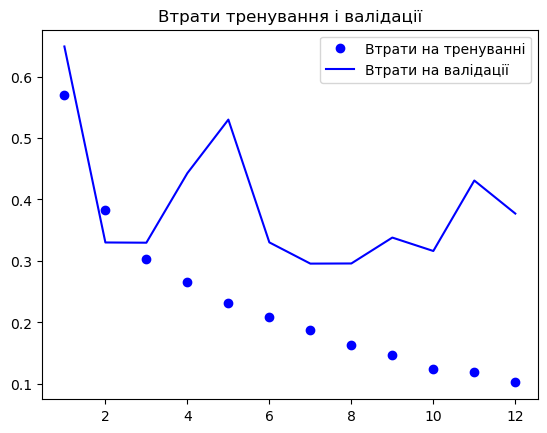

In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [19]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 302s 384ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 314s 401ms/step - acc: 0.8812 - loss: 0.3189
Test Loss: 0.3139077126979828
Test Accuracy: 0.8814399838447571


### LSTM*2 + Dropout, 15 epochs, batch 64, rmsprop, MinMaxNorm, earlystiop

In [11]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(8, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=64,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 170s 601ms/step - acc: 0.6123 - loss: 0.6314 - val_acc: 0.7536 - val_loss: 0.5416
Epoch 2/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 164s 599ms/step - acc: 0.8486 - loss: 0.3716 - val_acc: 0.8109 - val_loss: 0.4451
Epoch 3/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 160s 583ms/step - acc: 0.8789 - loss: 0.3061 - val_acc: 0.8644 - val_loss: 0.3894
Epoch 4/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 161s 589ms/step - acc: 0.9022 - loss: 0.2630 - val_acc: 0.8816 - val_loss: 0.2910
Epoch 5/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 159s 580ms/step - acc: 0.9018 - loss: 0.2524 - val_acc: 0.8703 - val_loss: 0.3147
Epoch 6/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 160s 584ms/step - acc: 0.9257 - loss: 0.2022 - val_acc: 0.8441 - val_loss: 0.3500
Epoch 7/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 158s 576ms/step - acc: 0.9352 - loss: 0.1856 - val_acc: 0.8591 - val_loss: 0.3470
Epoch 8/15
274/274 ━━━━━━━━━━━━━━━━━━━━ 161s 586ms/step - acc: 0.9486 - loss: 0.1546 - val_acc: 0.8849 - val_loss: 0.3206
Epoch 9/15
274/274 ━━━━━

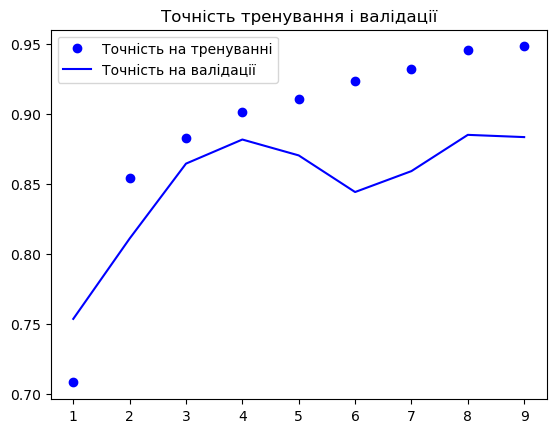

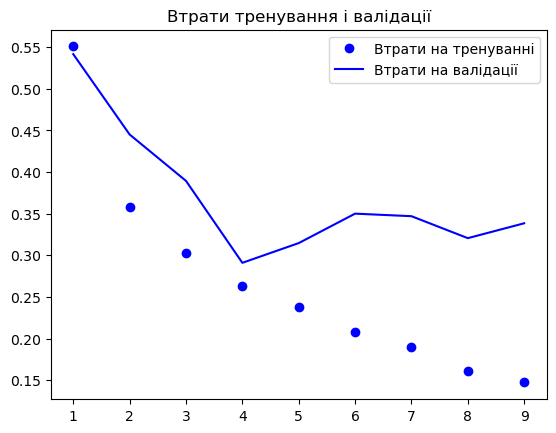

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [14]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 129ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 131ms/step - acc: 0.8749 - loss: 0.3027
Test Loss: 0.30074527859687805
Test Accuracy: 0.8774399757385254


### LSTM*2 + Dropout, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [15]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(8, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 131s 906ms/step - acc: 0.5706 - loss: 0.6660 - val_acc: 0.7848 - val_loss: 0.4846
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 121s 883ms/step - acc: 0.8088 - loss: 0.4463 - val_acc: 0.8563 - val_loss: 0.3565
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 152s 959ms/step - acc: 0.8477 - loss: 0.3732 - val_acc: 0.8348 - val_loss: 0.4006
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 123s 899ms/step - acc: 0.8765 - loss: 0.3172 - val_acc: 0.8469 - val_loss: 0.3638
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 123s 901ms/step - acc: 0.8925 - loss: 0.2845 - val_acc: 0.8787 - val_loss: 0.3065
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 130s 952ms/step - acc: 0.9026 - loss: 0.2540 - val_acc: 0.8711 - val_loss: 0.3172
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 127s 926ms/step - acc: 0.9129 - loss: 0.2274 - val_acc: 0.8615 - val_loss: 0.3650
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 131s 951ms/step - acc: 0.9227 - loss: 0.2117 - val_acc: 0.8369 - val_loss: 0.3919
Epoch 9/15
137/137 ━━━━━

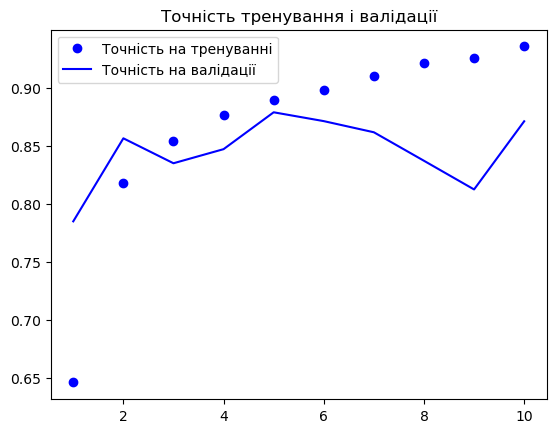

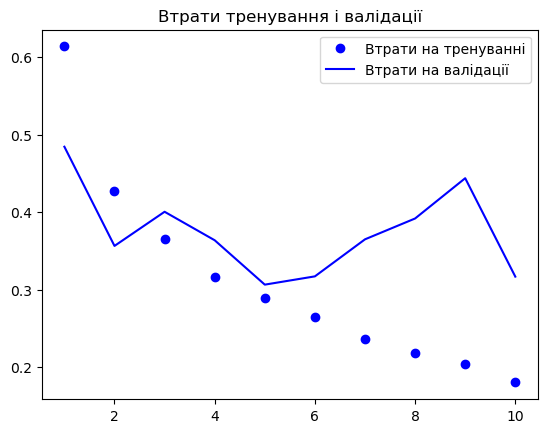

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [18]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - acc: 0.8748 - loss: 0.3133
Test Loss: 0.31363174319267273
Test Accuracy: 0.8756800293922424


### LSTM*2 + Dropout*2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [19]:
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(8, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 113s 786ms/step - acc: 0.5512 - loss: 0.6772 - val_acc: 0.7657 - val_loss: 0.5085
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 104s 759ms/step - acc: 0.7878 - loss: 0.4828 - val_acc: 0.8448 - val_loss: 0.3848
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 103s 755ms/step - acc: 0.8559 - loss: 0.3817 - val_acc: 0.8519 - val_loss: 0.3603
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 120s 873ms/step - acc: 0.8765 - loss: 0.3358 - val_acc: 0.8661 - val_loss: 0.3298
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 136s 983ms/step - acc: 0.8868 - loss: 0.3056 - val_acc: 0.8173 - val_loss: 0.4009
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 100s 690ms/step - acc: 0.9024 - loss: 0.2740 - val_acc: 0.8664 - val_loss: 0.3215
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 111s 814ms/step - acc: 0.9128 - loss: 0.2491 - val_acc: 0.8776 - val_loss: 0.2970
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 101s 735ms/step - acc: 0.9181 - loss: 0.2333 - val_acc: 0.8559 - val_loss: 0.3909
Epoch 9/15
137/137 ━━━━━

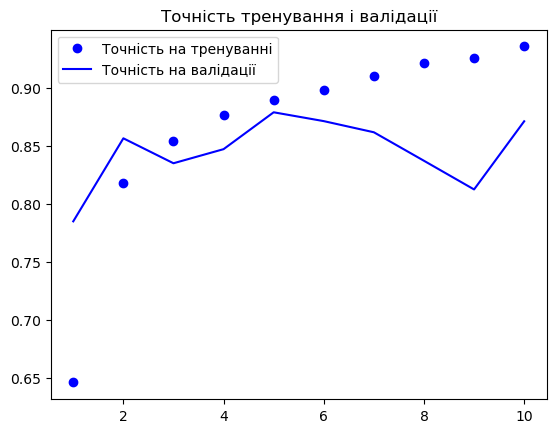

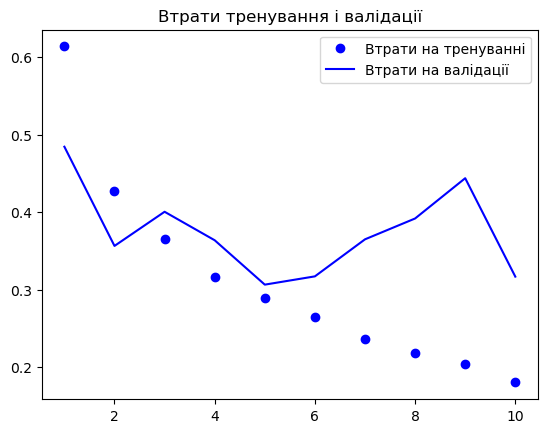

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [ ]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 116ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 106s 136ms/step - acc: 0.8748 - loss: 0.3133
Test Loss: 0.31363174319267273
Test Accuracy: 0.8756800293922424


# Bidirectional

### BD LMST + Dropout, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [50]:

model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(Bidirectional(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.))))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 123s 848ms/step - acc: 0.5508 - loss: 0.6819 - val_acc: 0.7684 - val_loss: 0.5047
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 84s 611ms/step - acc: 0.7850 - loss: 0.4755 - val_acc: 0.8445 - val_loss: 0.3718
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 84s 612ms/step - acc: 0.8427 - loss: 0.3745 - val_acc: 0.8640 - val_loss: 0.3309
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 85s 621ms/step - acc: 0.8738 - loss: 0.3244 - val_acc: 0.8593 - val_loss: 0.3376
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 86s 627ms/step - acc: 0.8920 - loss: 0.2900 - val_acc: 0.7931 - val_loss: 0.5658
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 608ms/step - acc: 0.9016 - loss: 0.2622 - val_acc: 0.8719 - val_loss: 0.3215
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 84s 611ms/step - acc: 0.9117 - loss: 0.2366 - val_acc: 0.8508 - val_loss: 0.3502
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 105s 764ms/step - acc: 0.9133 - loss: 0.2279 - val_acc: 0.8784 - val_loss: 0.2976
Epoch 9/15
137/137 ━━━━━━━━━━━

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [52]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 118ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - acc: 0.8741 - loss: 0.3091
Test Loss: 0.30379778146743774
Test Accuracy: 0.8766400218009949


### BD LMST x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [53]:

model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(Bidirectional(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(16, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.))))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - acc: 0.5628 - loss: 0.6721 - val_acc: 0.7856 - val_loss: 0.4726
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - acc: 0.8034 - loss: 0.4442 - val_acc: 0.8548 - val_loss: 0.3566
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - acc: 0.8655 - loss: 0.3442 - val_acc: 0.8748 - val_loss: 0.3192
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - acc: 0.8826 - loss: 0.2949 - val_acc: 0.8724 - val_loss: 0.3135
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - acc: 0.9019 - loss: 0.2596 - val_acc: 0.8827 - val_loss: 0.3022
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - acc: 0.9130 - loss: 0.2403 - val_acc: 0.8721 - val_loss: 0.3315
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - acc: 0.9272 - loss: 0.2009 - val_acc: 0.8567 - val_loss: 0.3814
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - acc: 0.9376 - loss: 0.1773 - val_acc: 0.8481 - val_loss: 0.3566
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/

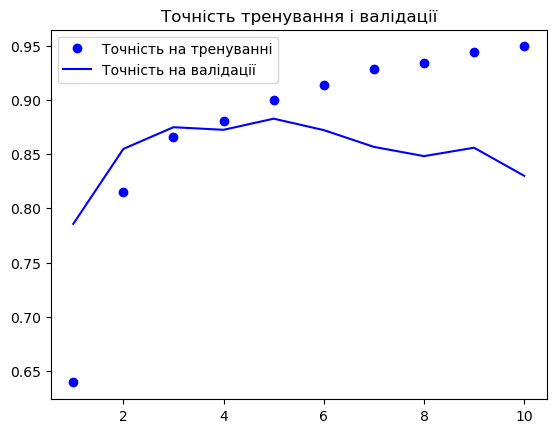

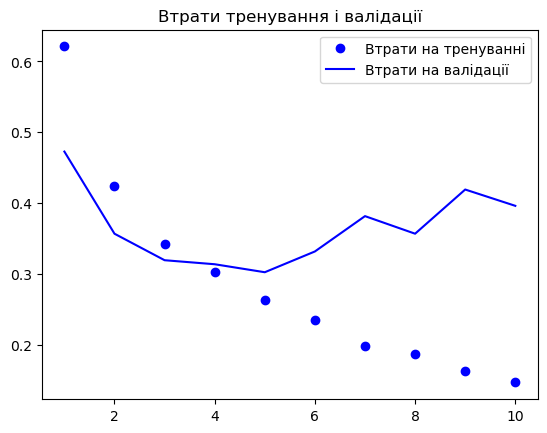

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [56]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 202ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step - acc: 0.8753 - loss: 0.3115
Test Loss: 0.3064573109149933
Test Accuracy: 0.8781200051307678


### BD LMST x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [57]:

model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(Bidirectional(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.), return_sequences = True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(16, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.))))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [58]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - acc: 0.5162 - loss: 0.6904 - val_acc: 0.6476 - val_loss: 0.6287
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - acc: 0.7565 - loss: 0.5168 - val_acc: 0.8295 - val_loss: 0.3999
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - acc: 0.8376 - loss: 0.3888 - val_acc: 0.8584 - val_loss: 0.3347
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - acc: 0.8690 - loss: 0.3305 - val_acc: 0.8421 - val_loss: 0.3907
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 286s 2s/step - acc: 0.8946 - loss: 0.2831 - val_acc: 0.8717 - val_loss: 0.3406
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - acc: 0.9088 - loss: 0.2464 - val_acc: 0.8792 - val_loss: 0.3014
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - acc: 0.9125 - loss: 0.2304 - val_acc: 0.8617 - val_loss: 0.3560
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - acc: 0.9337 - loss: 0.1888 - val_acc: 0.8053 - val_loss: 0.5069
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/

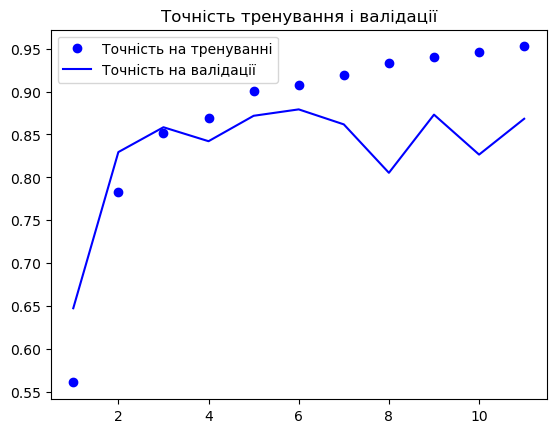

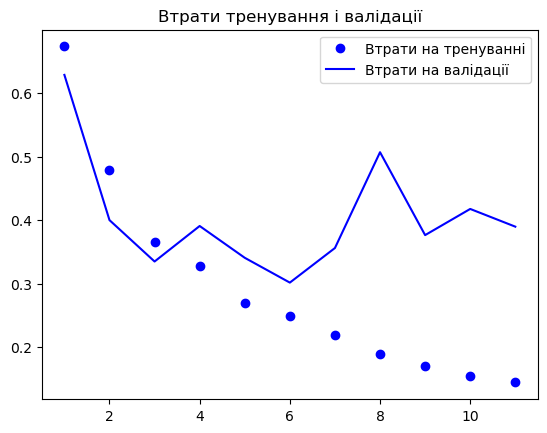

In [59]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [60]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 152ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 151s 193ms/step - acc: 0.8746 - loss: 0.3129
Test Loss: 0.3086693584918976
Test Accuracy: 0.8755999803543091


### BD LMST x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [79]:

model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(Bidirectional(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(16, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.))))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_23                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_24                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [80]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - acc: 0.5234 - loss: 0.6855 - val_acc: 0.7763 - val_loss: 0.4988
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - acc: 0.7770 - loss: 0.4914 - val_acc: 0.8235 - val_loss: 0.4061
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - acc: 0.8517 - loss: 0.3710 - val_acc: 0.8543 - val_loss: 0.3516
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - acc: 0.8791 - loss: 0.3116 - val_acc: 0.8791 - val_loss: 0.3033
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - acc: 0.8807 - loss: 0.3042 - val_acc: 0.8592 - val_loss: 0.3362
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - acc: 0.9059 - loss: 0.2459 - val_acc: 0.7013 - val_loss: 0.8319
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 307s 2s/step - acc: 0.9076 - loss: 0.2412 - val_acc: 0.8613 - val_loss: 0.3467
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - acc: 0.9321 - loss: 0.1938 - val_acc: 0.8733 - val_loss: 0.3210
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/

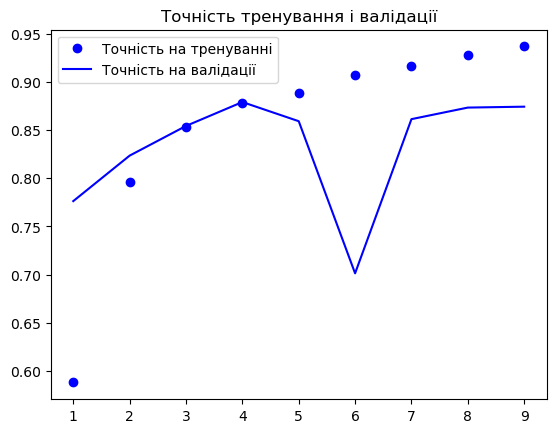

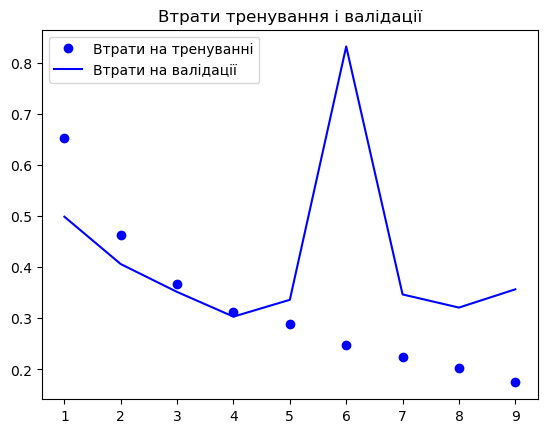

In [81]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [82]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 180ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 142s 182ms/step - acc: 0.8745 - loss: 0.3073
Test Loss: 0.3038521409034729
Test Accuracy: 0.8768399953842163


### BD GRU x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [67]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(GRU(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.), return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(32)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_17                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_18                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - acc: 0.5350 - loss: 0.6863 - val_acc: 0.7243 - val_loss: 0.5393
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step - acc: 0.7607 - loss: 0.4943 - val_acc: 0.8303 - val_loss: 0.3932
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 379s 3s/step - acc: 0.8303 - loss: 0.3897 - val_acc: 0.8245 - val_loss: 0.3988
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - acc: 0.8547 - loss: 0.3464 - val_acc: 0.8227 - val_loss: 0.4152
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 396s 3s/step - acc: 0.8768 - loss: 0.3061 - val_acc: 0.8197 - val_loss: 0.4182
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 439s 3s/step - acc: 0.8876 - loss: 0.2803 - val_acc: 0.8645 - val_loss: 0.3302
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 398s 3s/step - acc: 0.9005 - loss: 0.2612 - val_acc: 0.8512 - val_loss: 0.3656
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - acc: 0.9057 - loss: 0.2402 - val_acc: 0.8627 - val_loss: 0.3394
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/

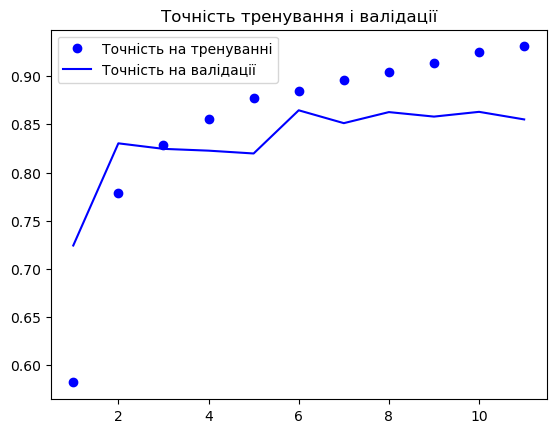

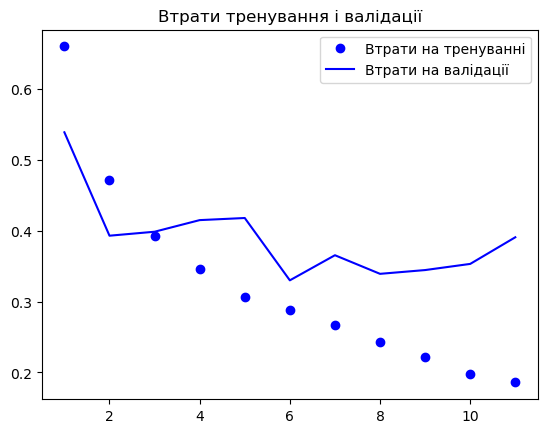

In [69]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [70]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 200ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 157s 201ms/step - acc: 0.8604 - loss: 0.3340
Test Loss: 0.3323076069355011
Test Accuracy: 0.8610799908638


# Deep

### BD GRU x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [75]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(GRU(32, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_22                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [76]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 288s 2s/step - acc: 0.5481 - loss: 0.6785 - val_acc: 0.7665 - val_loss: 0.4873
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - acc: 0.7895 - loss: 0.4618 - val_acc: 0.8321 - val_loss: 0.3953
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - acc: 0.8455 - loss: 0.3664 - val_acc: 0.8429 - val_loss: 0.3709
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - acc: 0.8698 - loss: 0.3234 - val_acc: 0.8700 - val_loss: 0.3215
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - acc: 0.8799 - loss: 0.3050 - val_acc: 0.8345 - val_loss: 0.3920
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - acc: 0.8967 - loss: 0.2675 - val_acc: 0.8616 - val_loss: 0.3273
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - acc: 0.9023 - loss: 0.2484 - val_acc: 0.8496 - val_loss: 0.3434
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - acc: 0.9154 - loss: 0.2334 - val_acc: 0.8601 - val_loss: 0.3571
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/

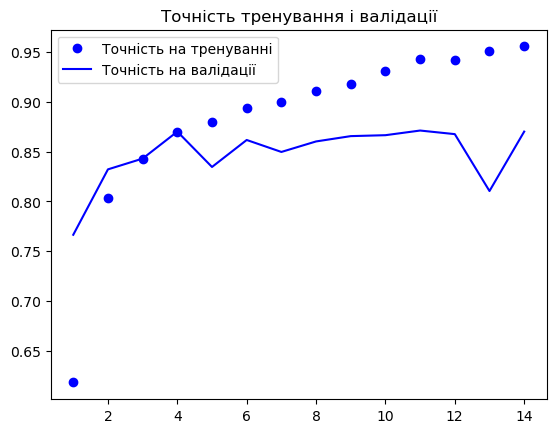

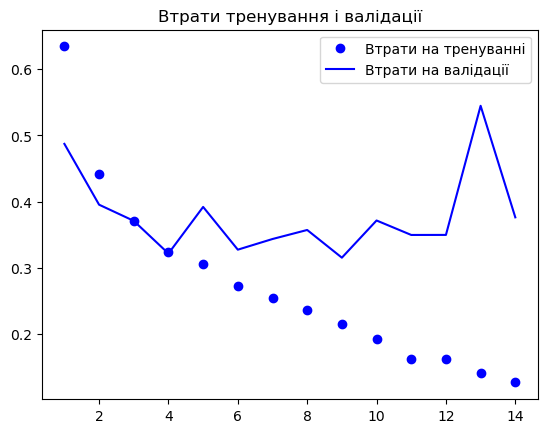

In [77]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [78]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 192ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 177ms/step - acc: 0.8636 - loss: 0.3228
Test Loss: 0.3173882067203522
Test Accuracy: 0.8667600154876709


### BD GRU x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop

In [84]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(GRU(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_26                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [85]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - acc: 0.5521 - loss: 0.6761 - val_acc: 0.7711 - val_loss: 0.4801
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - acc: 0.7857 - loss: 0.4601 - val_acc: 0.8243 - val_loss: 0.4031
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - acc: 0.8442 - loss: 0.3748 - val_acc: 0.8364 - val_loss: 0.3810
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - acc: 0.8635 - loss: 0.3358 - val_acc: 0.8337 - val_loss: 0.3783
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - acc: 0.8806 - loss: 0.3002 - val_acc: 0.8585 - val_loss: 0.3527
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - acc: 0.8880 - loss: 0.2821 - val_acc: 0.8713 - val_loss: 0.3111
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - acc: 0.8972 - loss: 0.2593 - val_acc: 0.8749 - val_loss: 0.3040
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - acc: 0.9035 - loss: 0.2359 - val_acc: 0.8807 - val_loss: 0.3270
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 336s 2s/

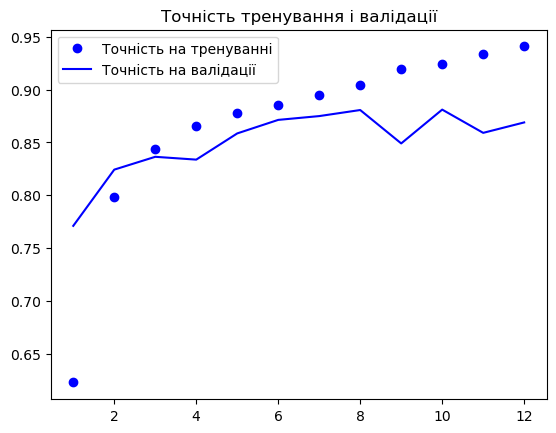

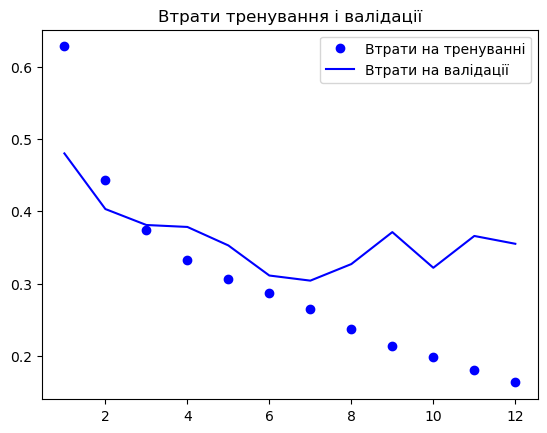

In [86]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [87]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 173s 219ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 185s 237ms/step - acc: 0.8721 - loss: 0.3185
Test Loss: 0.31542345881462097
Test Accuracy: 0.8726800084114075


### BD GRU x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop, kernel init TruncatedNormal

In [90]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(GRU(32, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
                            kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), 
                            return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_27                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - acc: 0.5968 - loss: 0.6520 - val_acc: 0.7859 - val_loss: 0.4643
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - acc: 0.8118 - loss: 0.4275 - val_acc: 0.8551 - val_loss: 0.3521
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - acc: 0.8506 - loss: 0.3533 - val_acc: 0.8600 - val_loss: 0.3360
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - acc: 0.8768 - loss: 0.3083 - val_acc: 0.8195 - val_loss: 0.4006
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - acc: 0.8895 - loss: 0.2756 - val_acc: 0.8189 - val_loss: 0.4395
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - acc: 0.9079 - loss: 0.2414 - val_acc: 0.8528 - val_loss: 0.3619
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - acc: 0.9230 - loss: 0.2118 - val_acc: 0.8728 - val_loss: 0.3120
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - acc: 0.9337 - loss: 0.1780 - val_acc: 0.8439 - val_loss: 0.4374
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/

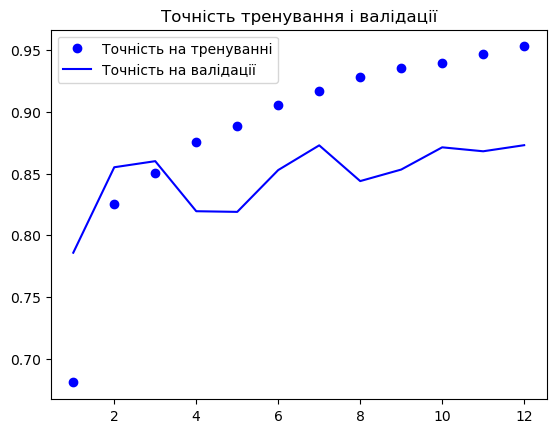

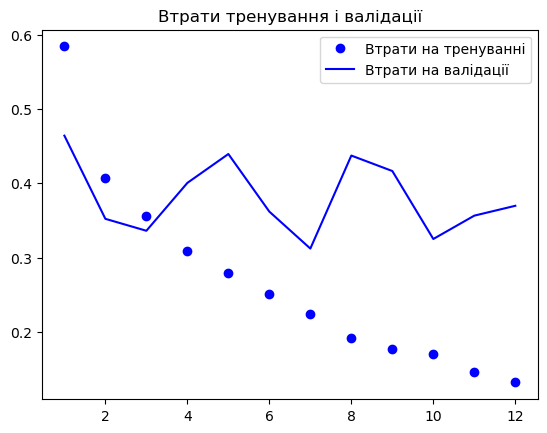

In [92]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [93]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 200s 254ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 187s 239ms/step - acc: 0.8687 - loss: 0.3186
Test Loss: 0.3153418302536011
Test Accuracy: 0.8716800212860107


### BD GRU x2 + Dropout x2, 15 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop, kernel init TruncatedNormal

In [95]:

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(GRU(32, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
                            kernel_constraint=MinMaxNorm(min_value=0.001, max_value=2.), 
                            return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(32, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.001, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_28                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [96]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - acc: 0.5828 - loss: 0.6572 - val_acc: 0.8005 - val_loss: 0.4369
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 330s 2s/step - acc: 0.8138 - loss: 0.4256 - val_acc: 0.8131 - val_loss: 0.4281
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - acc: 0.8551 - loss: 0.3529 - val_acc: 0.8523 - val_loss: 0.3490
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 353s 3s/step - acc: 0.8681 - loss: 0.3142 - val_acc: 0.8109 - val_loss: 0.4253
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 364s 3s/step - acc: 0.8802 - loss: 0.2950 - val_acc: 0.8080 - val_loss: 0.4774
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 344s 3s/step - acc: 0.8980 - loss: 0.2607 - val_acc: 0.8533 - val_loss: 0.3372
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 345s 3s/step - acc: 0.9058 - loss: 0.2411 - val_acc: 0.8489 - val_loss: 0.3624
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 377s 2s/step - acc: 0.9173 - loss: 0.2114 - val_acc: 0.8628 - val_loss: 0.3394
Epoch 9/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/

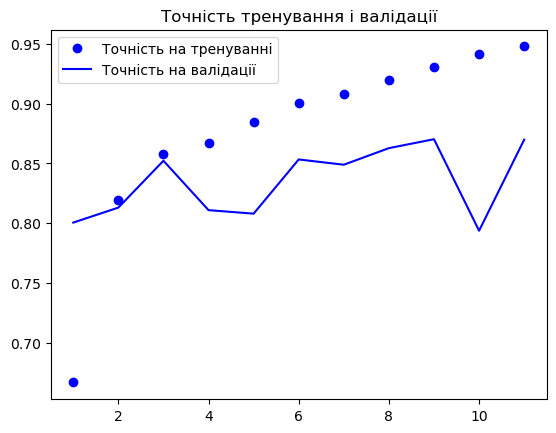

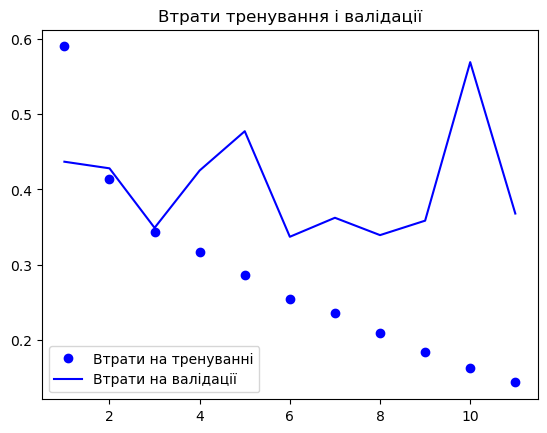

In [97]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [98]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 199ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 157s 201ms/step - acc: 0.8531 - loss: 0.3405
Test Loss: 0.33600082993507385
Test Accuracy: 0.8553199768066406


### BD GRU x2 + Dropout x2, 10 epochs, batch 128, rmsprop, MinMaxNorm, earlystiop, kernel init TruncatedNormal, LRS

In [210]:

model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(GRU(16, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
                            kernel_constraint=MinMaxNorm(min_value=0.01, max_value=2.), 
                            return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(8, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_60 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_30                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [211]:
history = model.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(schedule_2),
                               tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True)])

Epoch 1/10


137/137 ━━━━━━━━━━━━━━━━━━━━ 255s 2s/step - acc: 0.5579 - loss: 0.6860 - val_acc: 0.7199 - val_loss: 0.5712 - learning_rate: 0.0010
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - acc: 0.7781 - loss: 0.5165 - val_acc: 0.8292 - val_loss: 0.4224 - learning_rate: 0.0010
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - acc: 0.8352 - loss: 0.4145 - val_acc: 0.8408 - val_loss: 0.3825 - learning_rate: 0.0010
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - acc: 0.8624 - loss: 0.3631 - val_acc: 0.8520 - val_loss: 0.3714 - learning_rate: 0.0010
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - acc: 0.8814 - loss: 0.3180 - val_acc: 0.8385 - val_loss: 0.3691 - learning_rate: 0.0010
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - acc: 0.9121 - loss: 0.2596 - val_acc: 0.8585 - val_loss: 0.3508 - learning_rate: 1.0000e-04
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - acc: 0.9205 - loss: 0.2467 - val_acc: 0.8603 - val_loss: 0.3428 - learning_rate: 1.0000e-04
Ep

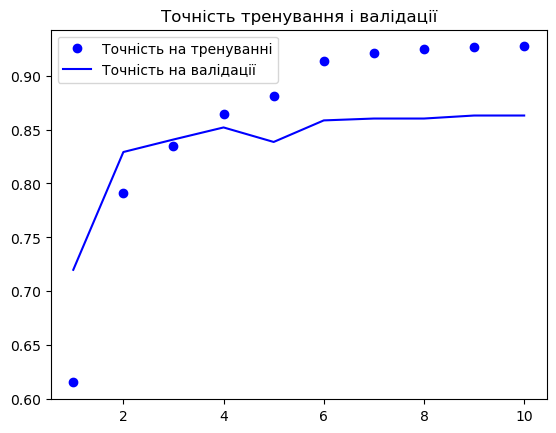

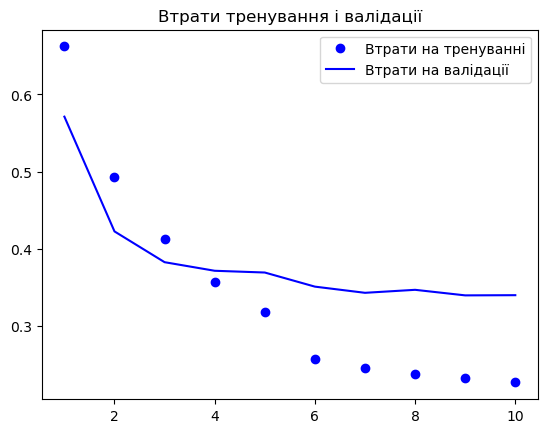

In [212]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [213]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 153ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - acc: 0.8618 - loss: 0.3493
Test Loss: 0.34560227394104004
Test Accuracy: 0.8640000224113464


### BD GRU LSTM x2 + Dropout x3, 10 epochs, batch 64, rmsprop, MinMaxNorm, earlystiop, kernel init TruncatedNormal, LRS

In [217]:

model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(GRU(16, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
                            kernel_constraint=MinMaxNorm(min_value=0.01, max_value=2.), 
                            return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(8, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.),
               return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(4, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_62 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_32                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [218]:
history = model.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(schedule_2),
                               tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True)])

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 508s 2s/step - acc: 0.5872 - loss: 0.6528 - val_acc: 0.7925 - val_loss: 0.4774 - learning_rate: 0.0010
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 545s 2s/step - acc: 0.8224 - loss: 0.4355 - val_acc: 0.8524 - val_loss: 0.3762 - learning_rate: 0.0010
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 548s 2s/step - acc: 0.8682 - loss: 0.3547 - val_acc: 0.8224 - val_loss: 0.4250 - learning_rate: 0.0010
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 549s 2s/step - acc: 0.8867 - loss: 0.3093 - val_acc: 0.8495 - val_loss: 0.3546 - learning_rate: 0.0010
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 544s 2s/step - acc: 0.9149 - loss: 0.2465 - val_acc: 0.8632 - val_loss: 0.3345 - learning_rate: 0.0010
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - acc: 0.9435 - loss: 0.1867 - val_acc: 0.8788 - val_loss: 0.3117 - learning_rate: 1.0000e-04
Epoch 7/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 543s 2s/step - acc: 0.9458 - loss: 0.1754 - val_acc: 0.8785 - val_loss: 0.3138 - learning_rate: 1.

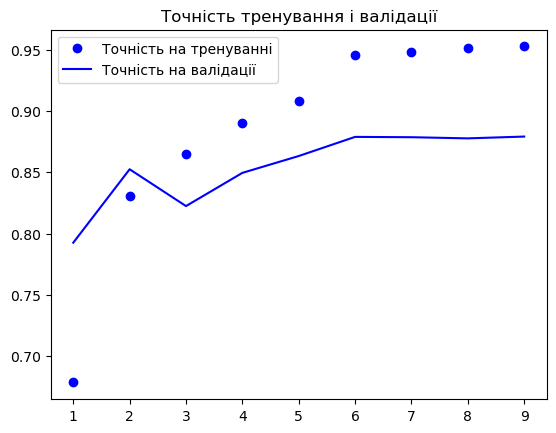

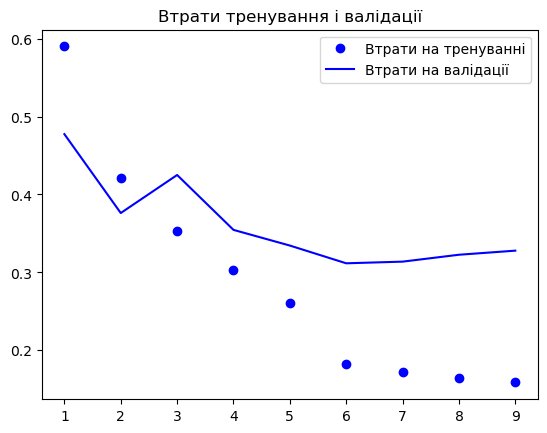

In [219]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [220]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 194ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 204ms/step - acc: 0.8731 - loss: 0.3262
Test Loss: 0.32482120394706726
Test Accuracy: 0.8751199841499329


### BD LSTM GRU + Dropout x3, 10 epochs, batch 64, rmsprop, MinMaxNorm, earlystiop, kernel init TruncatedNormal, LRS

In [221]:

model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(LSTM(16, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
                            kernel_constraint=MinMaxNorm(min_value=0.01, max_value=2.), 
                            return_sequences=True)))
model.add(Dropout(0.5))
model.add(GRU(8, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.),
               return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(4, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_63 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_33                │ ?                      │   0 (unbuilt) │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_14 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_15 (GRU)                    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [222]:
history = model.fit(input_train,
                    y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.LearningRateScheduler(schedule_2),
                               tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True)])

Epoch 1/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 553s 2s/step - acc: 0.6147 - loss: 0.6439 - val_acc: 0.6549 - val_loss: 0.7373 - learning_rate: 0.0010
Epoch 2/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 539s 2s/step - acc: 0.8513 - loss: 0.3939 - val_acc: 0.8429 - val_loss: 0.3810 - learning_rate: 0.0010
Epoch 3/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - acc: 0.8953 - loss: 0.2986 - val_acc: 0.8749 - val_loss: 0.3152 - learning_rate: 0.0010
Epoch 4/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - acc: 0.9185 - loss: 0.2491 - val_acc: 0.8676 - val_loss: 0.3298 - learning_rate: 0.0010
Epoch 5/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 559s 2s/step - acc: 0.9358 - loss: 0.2102 - val_acc: 0.8756 - val_loss: 0.3426 - learning_rate: 0.0010
Epoch 6/10
274/274 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - acc: 0.9610 - loss: 0.1499 - val_acc: 0.8815 - val_loss: 0.3273 - learning_rate: 1.0000e-04


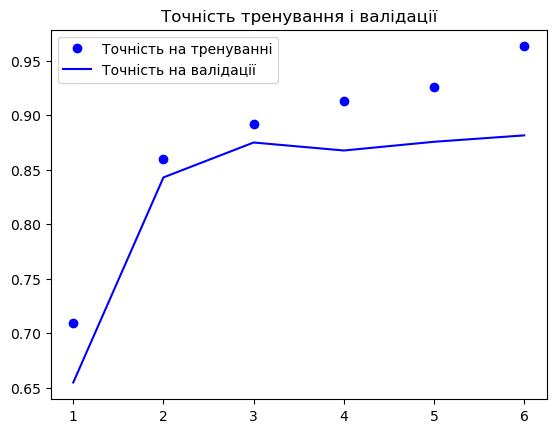

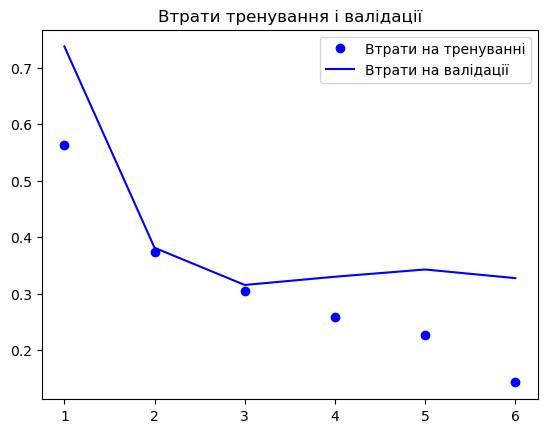

In [223]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [ ]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

# RNN

### RNN32

In [102]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_28 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_23 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - acc: 0.5846 - loss: 0.6651 - val_acc: 0.7653 - val_loss: 0.4984
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 263ms/step - acc: 0.8121 - loss: 0.4353 - val_acc: 0.8299 - val_loss: 0.3922
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 275ms/step - acc: 0.8649 - loss: 0.3310 - val_acc: 0.8047 - val_loss: 0.4265
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 276ms/step - acc: 0.8896 - loss: 0.2793 - val_acc: 0.8477 - val_loss: 0.4136
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - acc: 0.9151 - loss: 0.2225 - val_acc: 0.8581 - val_loss: 0.3804
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 274ms/step - acc: 0.9329 - loss: 0.1770 - val_acc: 0.8367 - val_loss: 0.4131
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 286ms/step - acc: 0.9570 - loss: 0.1297 - val_acc: 0.8268 - val_loss: 0.4566
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 268ms/step - acc: 0.9691 - loss: 0.0914 - val_acc: 0.8492 - val_loss: 0.4637
Epoch 9/15
137/137 ━━━━━━━━━━━━━

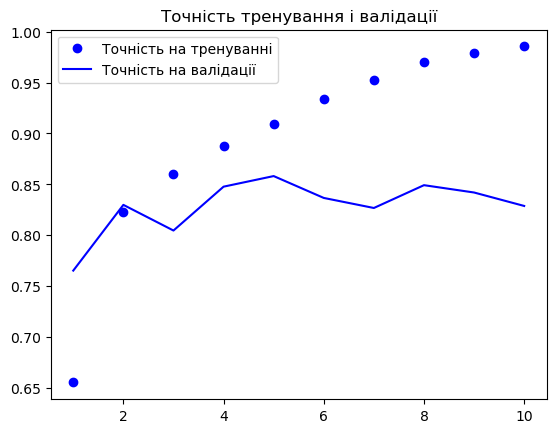

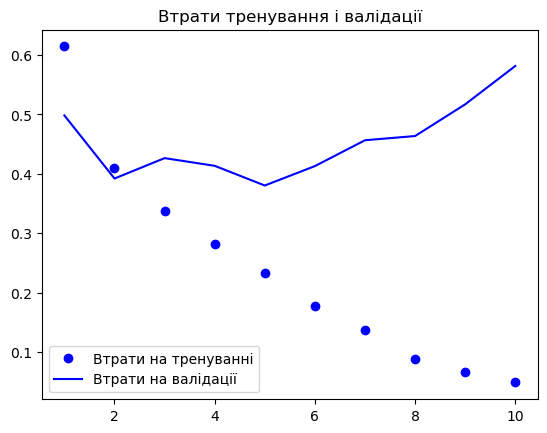

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [105]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - acc: 0.8531 - loss: 0.3929
Test Loss: 0.3902059495449066
Test Accuracy: 0.8538399934768677


### RNN 16

In [106]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=maxlen))
model.add(SimpleRNN(16, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_29 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_24 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [107]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 267ms/step - acc: 0.6245 - loss: 0.6331 - val_acc: 0.7880 - val_loss: 0.4645
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 303ms/step - acc: 0.8289 - loss: 0.4072 - val_acc: 0.7940 - val_loss: 0.4521
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 78s 273ms/step - acc: 0.8498 - loss: 0.3585 - val_acc: 0.8568 - val_loss: 0.3497
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 310ms/step - acc: 0.8810 - loss: 0.3002 - val_acc: 0.8288 - val_loss: 0.4062
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 246ms/step - acc: 0.9031 - loss: 0.2570 - val_acc: 0.8604 - val_loss: 0.3398
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 32s 237ms/step - acc: 0.9138 - loss: 0.2254 - val_acc: 0.8569 - val_loss: 0.3570
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - acc: 0.9283 - loss: 0.1937 - val_acc: 0.8609 - val_loss: 0.3795
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 279ms/step - acc: 0.9403 - loss: 0.1668 - val_acc: 0.8520 - val_loss: 0.3818
Epoch 9/15
137/137 ━━━━━━━━━━━━━

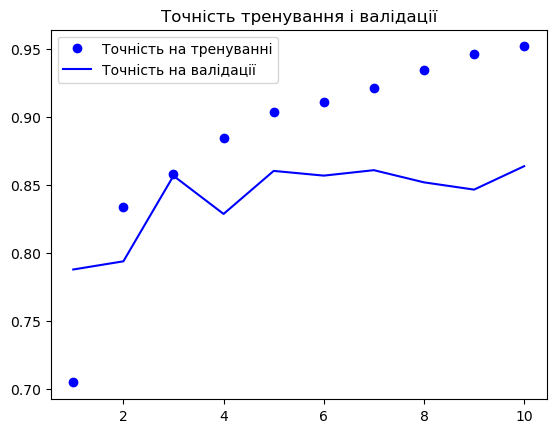

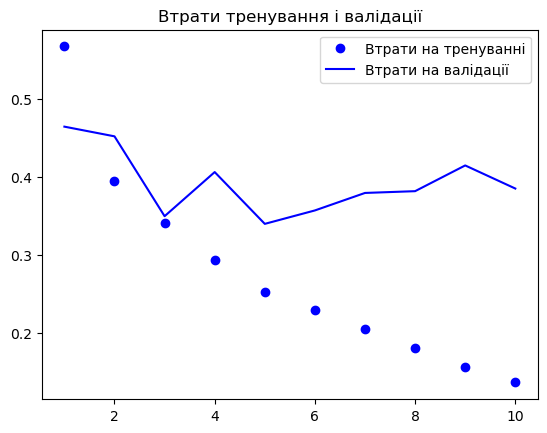

In [108]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [109]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - acc: 0.8548 - loss: 0.3497
Test Loss: 0.3444444239139557
Test Accuracy: 0.8572400212287903


### RNN 8

In [194]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=8, input_length=maxlen))
model.add(SimpleRNN(8, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_54 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_51 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [195]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 251ms/step - acc: 0.5162 - loss: 0.6929 - val_acc: 0.6435 - val_loss: 0.6637
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 246ms/step - acc: 0.6852 - loss: 0.6363 - val_acc: 0.7725 - val_loss: 0.5687
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - acc: 0.8008 - loss: 0.5273 - val_acc: 0.8196 - val_loss: 0.4731
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 256ms/step - acc: 0.8494 - loss: 0.4147 - val_acc: 0.7660 - val_loss: 0.5028
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 243ms/step - acc: 0.8798 - loss: 0.3334 - val_acc: 0.8320 - val_loss: 0.3960
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - acc: 0.9037 - loss: 0.2731 - val_acc: 0.8440 - val_loss: 0.3788
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 250ms/step - acc: 0.9168 - loss: 0.2341 - val_acc: 0.8483 - val_loss: 0.3736
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - acc: 0.9282 - loss: 0.2029 - val_acc: 0.8524 - val_loss: 0.3731
Epoch 9/15
137/137 ━━━━━━━━━━━━━

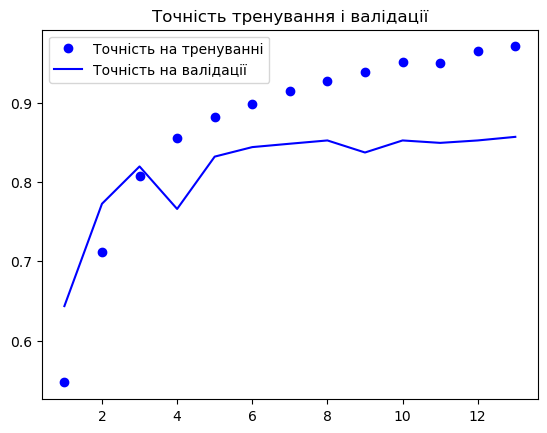

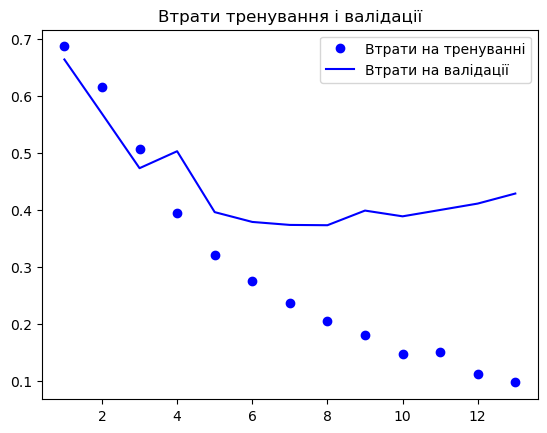

In [198]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [197]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - acc: 0.8508 - loss: 0.3771
Test Loss: 0.37651097774505615
Test Accuracy: 0.8499199748039246


### RNN 64

In [114]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=64, input_length=maxlen))
model.add(SimpleRNN(64, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_31 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_26 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [115]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=5, 
                                                                restore_best_weights=True)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 57s 371ms/step - acc: 0.5537 - loss: 0.6795 - val_acc: 0.7681 - val_loss: 0.5152
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 370ms/step - acc: 0.7851 - loss: 0.4683 - val_acc: 0.8144 - val_loss: 0.4276
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 363ms/step - acc: 0.8511 - loss: 0.3573 - val_acc: 0.8460 - val_loss: 0.3971
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 52s 382ms/step - acc: 0.8733 - loss: 0.3069 - val_acc: 0.8401 - val_loss: 0.3875
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 55s 403ms/step - acc: 0.9071 - loss: 0.2449 - val_acc: 0.8612 - val_loss: 0.3595
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 50s 365ms/step - acc: 0.9009 - loss: 0.2482 - val_acc: 0.8385 - val_loss: 0.4249
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 53s 385ms/step - acc: 0.9363 - loss: 0.1672 - val_acc: 0.8308 - val_loss: 0.4519
Epoch 8/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 76s 346ms/step - acc: 0.9545 - loss: 0.1235 - val_acc: 0.8269 - val_loss: 0.5519
Epoch 9/15
137/137 ━━━━━━━━━━━━━

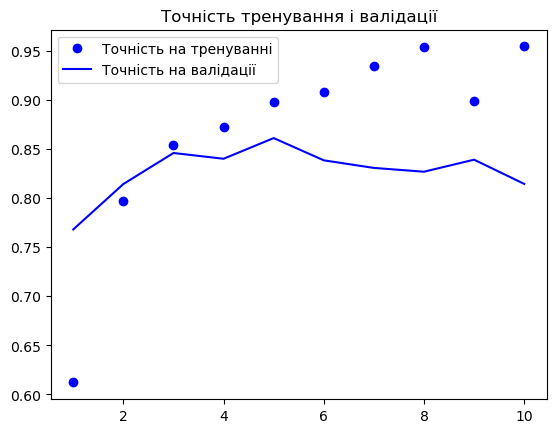

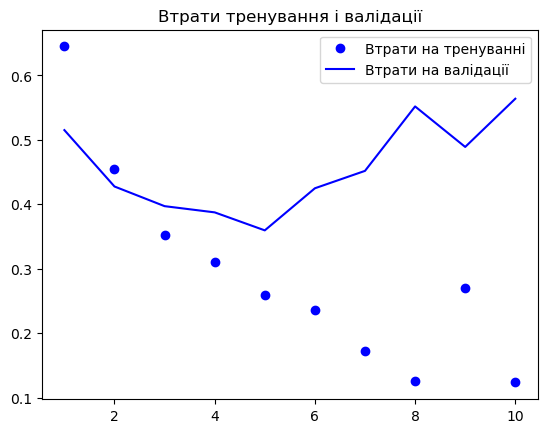

In [116]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [117]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - acc: 0.8540 - loss: 0.3642
Test Loss: 0.35792800784111023
Test Accuracy: 0.8573200106620789


### RNN 16 MinMaxNorm, EarlySytop, LRS

In [171]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=maxlen))
model.add(SimpleRNN(16, kernel_constraint=MinMaxNorm(min_value=0.001, max_value=1.), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_45 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_43 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [172]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True),tf.keras.callbacks.LearningRateScheduler(schedule)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - acc: 0.5255 - loss: 0.6900 - val_acc: 0.7432 - val_loss: 0.5758 - learning_rate: 0.0010
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 264ms/step - acc: 0.7681 - loss: 0.5174 - val_acc: 0.8145 - val_loss: 0.4318 - learning_rate: 0.0010
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step - acc: 0.8216 - loss: 0.4131 - val_acc: 0.8407 - val_loss: 0.3845 - learning_rate: 0.0010
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - acc: 0.8669 - loss: 0.3288 - val_acc: 0.8480 - val_loss: 0.3706 - learning_rate: 0.0010
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - acc: 0.9009 - loss: 0.2581 - val_acc: 0.8579 - val_loss: 0.3580 - learning_rate: 0.0010
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 37s 269ms/step - acc: 0.9256 - loss: 0.2054 - val_acc: 0.8592 - val_loss: 0.3420 - learning_rate: 5.0000e-04
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - acc: 0.9443 - loss: 0.1674 - val_acc: 0.8748 - val_loss: 0.3412 - lea

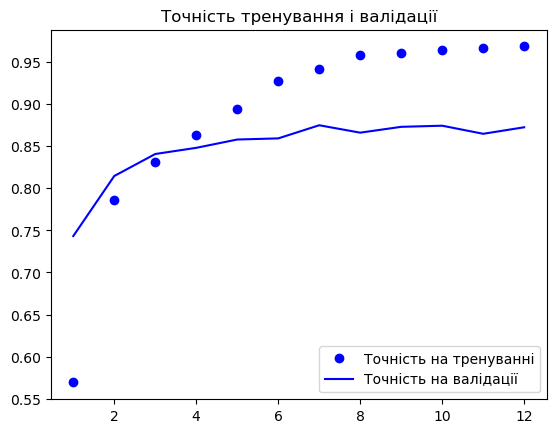

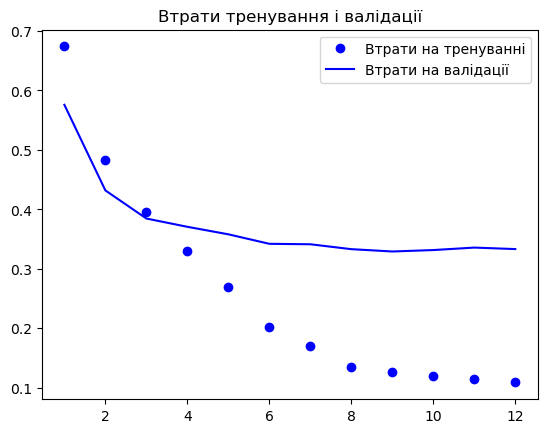

In [173]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [174]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - acc: 0.8634 - loss: 0.3450
Test Loss: 0.34128209948539734
Test Accuracy: 0.8654000163078308


### RNN 16 MinMaxNorm, EarlySytop, LRS skiptop data

In [178]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=maxlen))
model.add(SimpleRNN(16, kernel_constraint=MinMaxNorm(min_value=0.001, max_value=1.), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_47 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_45 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [179]:
history = model.fit(input_train_2,
                    y_train_2,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True),
                                tf.keras.callbacks.LearningRateScheduler(schedule)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 44s 279ms/step - acc: 0.5400 - loss: 0.6892 - val_acc: 0.6228 - val_loss: 0.6615 - learning_rate: 0.0010
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 245ms/step - acc: 0.6645 - loss: 0.6320 - val_acc: 0.5988 - val_loss: 0.6505 - learning_rate: 0.0010
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - acc: 0.7359 - loss: 0.5421 - val_acc: 0.7636 - val_loss: 0.5099 - learning_rate: 0.0010
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - acc: 0.8123 - loss: 0.4452 - val_acc: 0.7332 - val_loss: 0.5294 - learning_rate: 0.0010
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 265ms/step - acc: 0.8666 - loss: 0.3479 - val_acc: 0.7523 - val_loss: 0.5047 - learning_rate: 0.0010
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 297ms/step - acc: 0.9343 - loss: 0.2259 - val_acc: 0.7739 - val_loss: 0.4933 - learning_rate: 5.0000e-04
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 245ms/step - acc: 0.9458 - loss: 0.1813 - val_acc: 0.7489 - val_loss: 0.5438 - lea

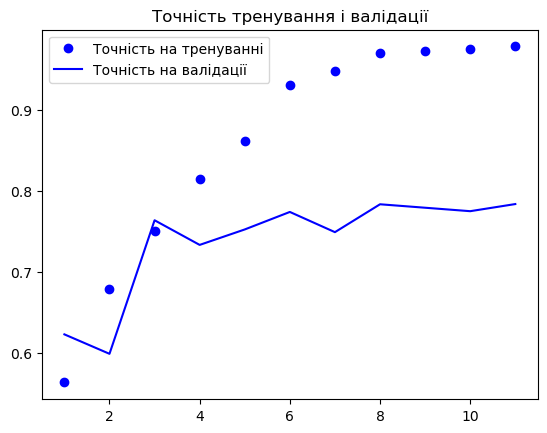

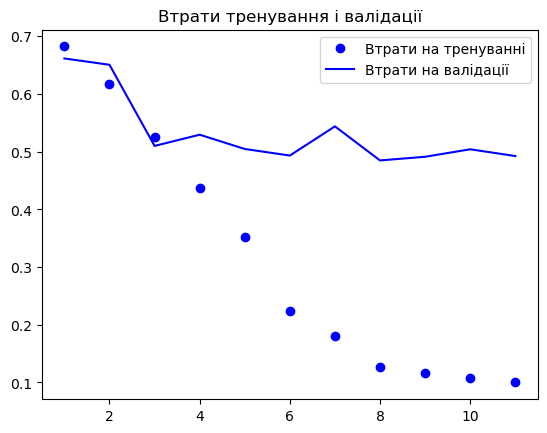

In [180]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [181]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - acc: 0.7642 - loss: 0.5249
Test Loss: 0.5207399725914001
Test Accuracy: 0.766319990158081


### RNN 16  MinMaxNorm (0.01-1), EarlySytop, LRS

In [189]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=maxlen))
model.add(SimpleRNN(16, kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_53 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_50 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [190]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True),
                                tf.keras.callbacks.LearningRateScheduler(schedule)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 273ms/step - acc: 0.6131 - loss: 0.6477 - val_acc: 0.5193 - val_loss: 0.9184 - learning_rate: 0.0010
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - acc: 0.7367 - loss: 0.5462 - val_acc: 0.8412 - val_loss: 0.3845 - learning_rate: 0.0010
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 265ms/step - acc: 0.8554 - loss: 0.3584 - val_acc: 0.8509 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - acc: 0.8819 - loss: 0.3013 - val_acc: 0.8713 - val_loss: 0.3236 - learning_rate: 0.0010
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - acc: 0.8904 - loss: 0.2822 - val_acc: 0.8704 - val_loss: 0.3345 - learning_rate: 0.0010
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - acc: 0.9302 - loss: 0.1933 - val_acc: 0.8692 - val_loss: 0.3127 - learning_rate: 5.0000e-04
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - acc: 0.9404 - loss: 0.1695 - val_acc: 0.8735 - val_loss: 0.3330 - lea

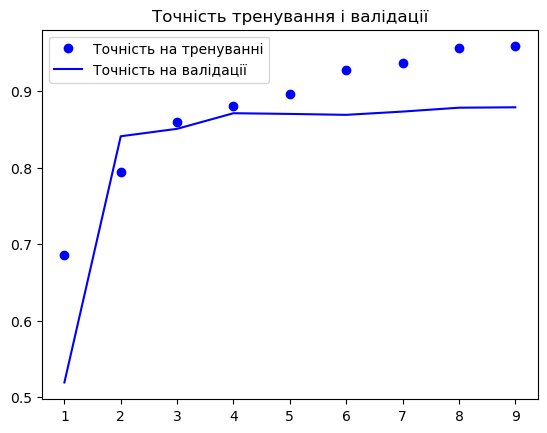

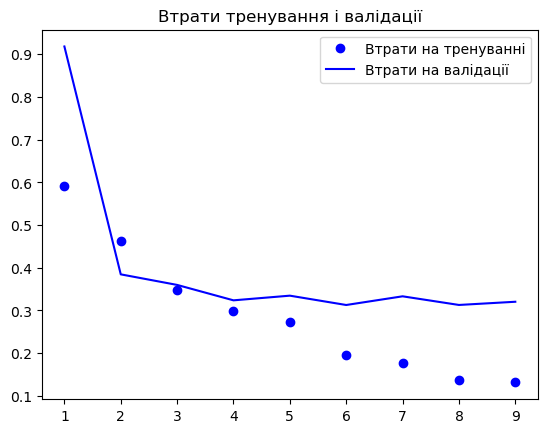

In [192]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [193]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - acc: 0.8697 - loss: 0.3194
Test Loss: 0.316992849111557
Test Accuracy: 0.8694400191307068


### RNN 16  MinMaxNorm (0.01-1), EarlySytop, LRS (2)

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=maxlen))
model.add(SimpleRNN(16, kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_53 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_50 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True),
                                tf.keras.callbacks.LearningRateScheduler(schedule_2)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 273ms/step - acc: 0.6131 - loss: 0.6477 - val_acc: 0.5193 - val_loss: 0.9184 - learning_rate: 0.0010
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 34s 251ms/step - acc: 0.7367 - loss: 0.5462 - val_acc: 0.8412 - val_loss: 0.3845 - learning_rate: 0.0010
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 265ms/step - acc: 0.8554 - loss: 0.3584 - val_acc: 0.8509 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 264ms/step - acc: 0.8819 - loss: 0.3013 - val_acc: 0.8713 - val_loss: 0.3236 - learning_rate: 0.0010
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - acc: 0.8904 - loss: 0.2822 - val_acc: 0.8704 - val_loss: 0.3345 - learning_rate: 0.0010
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - acc: 0.9302 - loss: 0.1933 - val_acc: 0.8692 - val_loss: 0.3127 - learning_rate: 5.0000e-04
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 261ms/step - acc: 0.9404 - loss: 0.1695 - val_acc: 0.8735 - val_loss: 0.3330 - lea

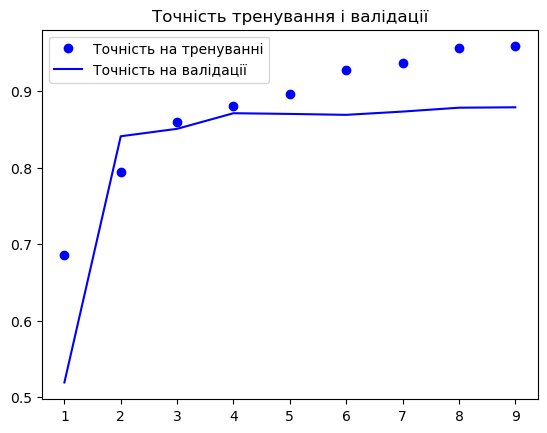

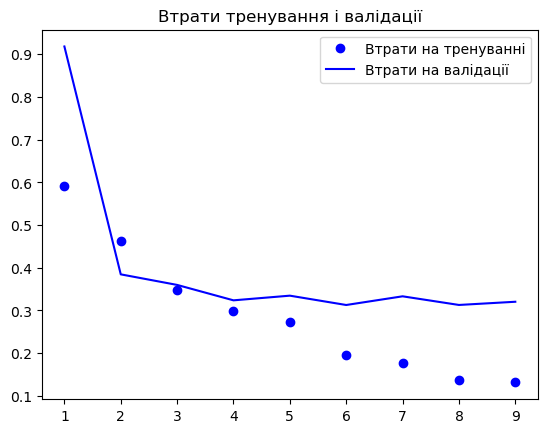

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [ ]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - acc: 0.8697 - loss: 0.3194
Test Loss: 0.316992849111557
Test Accuracy: 0.8694400191307068


### RNN 16 x2 Drop MinMaxNorm (0.01-1), EarlySytop, LRS (2)

In [204]:

model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=16, input_length=maxlen))
model.add(SimpleRNN(16, kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.), activation='tanh', return_sequences = True))
model.add(Dropout(0.3))
model.add(SimpleRNN(8, kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_58 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_56 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_57 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [205]:
history = model.fit(input_train,
                    y_train,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.3,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                                patience=3, 
                                                                restore_best_weights=True),
                                tf.keras.callbacks.LearningRateScheduler(schedule_2)])

Epoch 1/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 497ms/step - acc: 0.5201 - loss: 0.7003 - val_acc: 0.6672 - val_loss: 0.6028 - learning_rate: 0.0010
Epoch 2/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 70s 507ms/step - acc: 0.7320 - loss: 0.5407 - val_acc: 0.8200 - val_loss: 0.4222 - learning_rate: 0.0010
Epoch 3/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 68s 501ms/step - acc: 0.8444 - loss: 0.3806 - val_acc: 0.7767 - val_loss: 0.5132 - learning_rate: 0.0010
Epoch 4/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 66s 480ms/step - acc: 0.8807 - loss: 0.3062 - val_acc: 0.8508 - val_loss: 0.3811 - learning_rate: 0.0010
Epoch 5/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 67s 490ms/step - acc: 0.9025 - loss: 0.2556 - val_acc: 0.8024 - val_loss: 0.4761 - learning_rate: 0.0010
Epoch 6/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 73s 534ms/step - acc: 0.9445 - loss: 0.1681 - val_acc: 0.8699 - val_loss: 0.3444 - learning_rate: 1.0000e-04
Epoch 7/15
137/137 ━━━━━━━━━━━━━━━━━━━━ 74s 541ms/step - acc: 0.9543 - loss: 0.1419 - val_acc: 0.8692 - val_loss: 0.3469 - lea

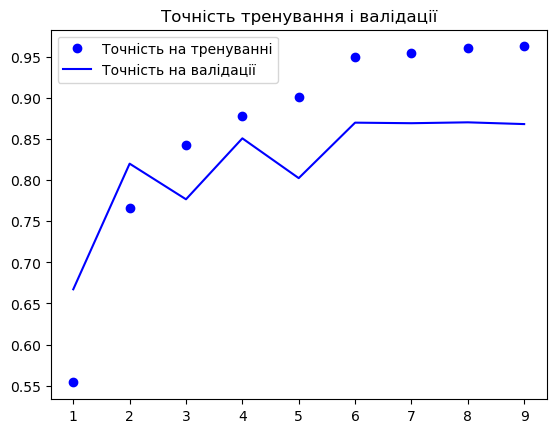

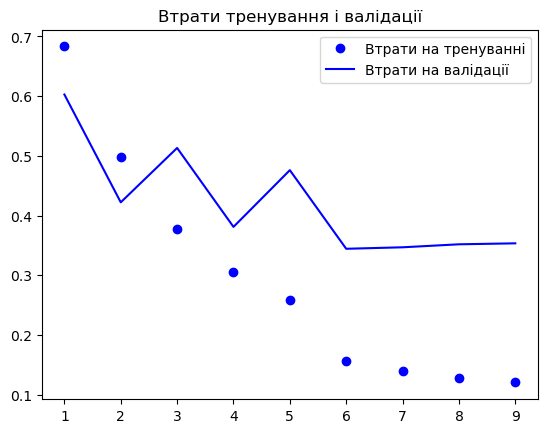

In [206]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні') 
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  
plt.title('Точність тренування і валідації')  
plt.legend()  

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації') 
plt.title('Втрати тренування і валідації')  
plt.legend()  

plt.show()  

In [207]:
predictions = model.predict(input_test)


binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]


for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")


test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - acc: 0.8596 - loss: 0.3618
Test Loss: 0.3583090901374817
Test Accuracy: 0.8619599938392639


# Results

З огляду на якість (велику засміченість) даних, важко досягти гарної ефективності навчання моделі.у


Серед моделей найефективніше відпрацювали:


**LSTM:**

```python
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(8, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
```



батч 128, 15 епох, EarlyStop

>> * 0.87 на тесті (0.94/0.88 на трейн/валідації)

**Bidirectional:**

```python
model = Sequential()
model.add(Embedding(max_features, 32)) 
model.add(Bidirectional(LSTM(32, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=2.), return_sequences = True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(16, kernel_constraint=MinMaxNorm(min_value=0.0, max_value=1.))))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
```

батч 128, 15 епох, EarlyStop

>> * 0.87 на тесті (0.93/0.87 на трейн/валідації)

**dEEP**

```python
model = Sequential()
model.add(Embedding(max_features, 16))
model.add(Bidirectional(LSTM(16, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
                            kernel_constraint=MinMaxNorm(min_value=0.01, max_value=2.), 
                            return_sequences=True)))
model.add(Dropout(0.5))
model.add(GRU(8, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.),
               return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(4, kernel_initializer=TruncatedNormal(mean=0.0, stddev=2,), 
               kernel_constraint=MinMaxNorm(min_value=0.01, max_value=1.)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()
```

батч 64, 10 епох, EarlyStop, LearningRateSchedule, MinMaxNorm kernel normalization

>> * 0.87 на тесті (0.93/0.87 на трейн/валідації)

нажаль, повінстю уникнути перенавчання бкз очищення даних не вдалося



